# Part I - Ford GoBike System Data Explorartion
## by Mazi Essoloani Aleza

## Introduction

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>This dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.
More information on this dataset can be found on this [this page](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems).




## [Preliminary Wrangling](#part1)

## [Univariate Exploration](#part2)

## [Bivariate Exploration](#part3)
## [Multivariate Exploration](#part4)
## [Conclusion](#conclusion)


In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [61]:
import warnings
warnings.filterwarnings('ignore')

# Prelimary Wrangling 

> Load in the dataset and describe its properties through the questions below. 

In [62]:
# load in the dataset into a pandas dataframe, print statistics
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [63]:
# Dataframe shape
bike_df.shape

(183412, 16)

> The bike_df has 183412 rows and 16 columns

In [64]:
# Data type
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

> The bike_df has data of type integer of base 64 (int64), float of base 64 (float 64) and object

In [65]:
# top 10 row in the dataframe
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [66]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [67]:
# checking for null values
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [68]:
# check for duplicated values
bike_df.duplicated().sum()

0

### cleaning the data

In [69]:
# drop null values
clean_df = bike_df.dropna()

In [70]:
# Change member birth year type from float to int
clean_df.member_birth_year = clean_df.member_birth_year.astype(int)

In [71]:
# some columns are unnecessary for this analys so it will drop them
clean_df.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

>Data overview after cleaning

In [72]:
clean_df.shape

(174952, 11)

In [73]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No


In [74]:
clean_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [75]:
clean_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [76]:
clean_df.tail()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,Subscriber,1996,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,Subscriber,1984,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,Subscriber,1990,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,Subscriber,1988,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,37.789677,-122.390428,37.785000,-122.395936,Subscriber,1989,Male,No


### What is the structure of your dataset?

> This dataset have 174952 rows and 11 columsn. I has the followinf comlumns: duration_sec of type int64
start_time of type object end_time   of type object start_station_latitude   of type  float64 start_station_longitude  of type  float64 end_station_latitude    of type   float64 end_station_longitude    of type  float64 user_type  of type object member_birth_year of type int32 member_gender  of type    object bike_share_for_all_trip of type object

### What is/are the main feature(s) of interest in your dataset?

> The durection in second (duration_sec) is the main feature of this dataset, it shows the trip duration in seconds

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> A part from the feature i dropped in the cleaning process, the remaining features will help me investigate, for example the station latitude and latitude will help me to visualize where the trip started and ended

## 2. Univariate Exploration

> In this section, i will investigate distributions of individual variables. If
i see unusual points or outliers,i will take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


>**Rubric Tip**: I will Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


 ### 2.1 Discover the Month, day of week and day.
 >I will visualize the pattern hiden in month, day and day of week

In [77]:
# extract the start and end date
from datetime import datetime
clean_df['start_date'] = clean_df.start_time.map(lambda x: x[:10])
clean_df['start_date'] = clean_df.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
clean_df['end_date'] = clean_df.end_time.map(lambda x: x[:10])
clean_df['end_date'] = clean_df.end_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [78]:
# remove the unrelevant column
clean_df.drop(columns=['start_time', 'end_time'], inplace=True)

In [79]:
# display the new dataframe
clean_df.head()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No,2019-02-28,2019-03-01
2,61854,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No,2019-02-28,2019-03-01
3,36490,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No,2019-02-28,2019-03-01
4,1585,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01
5,1793,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959,Male,No,2019-02-28,2019-03-01


In [80]:
clean_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [81]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_station_latitude   174952 non-null  float64       
 2   start_station_longitude  174952 non-null  float64       
 3   end_station_latitude     174952 non-null  float64       
 4   end_station_longitude    174952 non-null  float64       
 5   user_type                174952 non-null  object        
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   start_date               174952 non-null  datetime64[ns]
 10  end_date                 174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(3)
memory usage: 

In [82]:
clean_df.isnull().sum()

duration_sec               0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
end_date                   0
dtype: int64

## Day, week and Month
> In the next cell, i will explore the pattern behind day, week and month columns

In [83]:
# import datetime
from datetime import datetime

Text(0.5, 1.0, 'Month distibution')

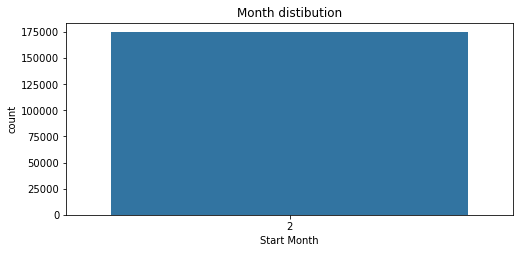

In [84]:
# extract the month, day, and day of week from the 'start_day'
clean_df['start_month'] = clean_df.start_date.map(lambda x: x.month)
clean_df['start_day'] = clean_df.start_date.map(lambda x: x.day)
clean_df['start_dayofweek'] = clean_df.start_date.map(lambda x: x.dayofweek)

base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 12])

# plot the month
plt.subplot(3, 1, 1)
sb.countplot(data=clean_df, x='start_month', color=base_color)
plt.xlabel('Start Month')
plt.title("Month distibution")





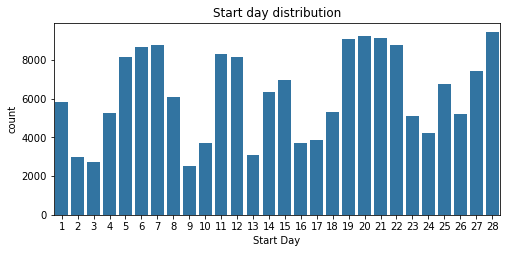

In [85]:
# plot the start day
plt.figure(figsize=[8, 12])
plt.subplot(3, 1, 1)
sb.countplot(data=clean_df, x='start_day', color=base_color)
plt.xlabel('Start Day')
plt.title("Start day distribution");

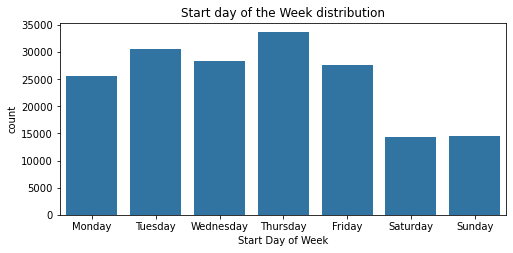

In [86]:
# plot the start day of week
plt.figure(figsize=[8, 12])
plt.subplot(3, 1, 1)
sb.countplot(data=clean_df, x='start_dayofweek', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Start Day of Week')
plt.title('Start day of the Week distribution');

> The above plots show that the observation have been made only in February, 28 February has the higest count and thursday has the higest count in start day of week

## 2.2 Duration
> In the next cell i will explore the duration variable

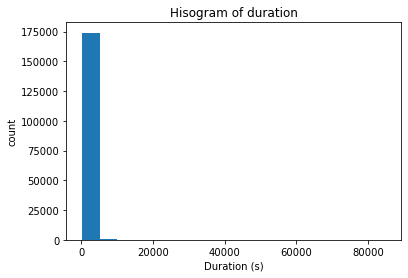

In [87]:
# histogram of duration
bins = np.arange(61, 84548+5000, 5000)

plt.hist(data=clean_df, x='duration_sec', bins=bins)
plt.xlabel('Duration (s)')
plt.ylabel('count')
plt.title('Hisogram of duration');

>The histogram shows a high peack in the right )right-skewed) of the duration distrubtion. This helps to conlude that the data has outliers and need attention (cleaning)

In [88]:
# find the outliers
outliers_df = clean_df.query('duration_sec > 20000')
outliers_df.shape

(173, 14)

In [89]:
outliers_df.head()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_month,start_day,start_dayofweek
0,52185,37.789625,-122.400811,37.794231,-122.402923,Customer,1984,Male,No,2019-02-28,2019-03-01,2,28,3
2,61854,37.769305,-122.426826,37.786375,-122.404904,Customer,1972,Male,No,2019-02-28,2019-03-01,2,28,3
3,36490,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989,Other,No,2019-02-28,2019-03-01,2,28,3
779,36190,37.776619,-122.417385,37.774836,-122.446546,Subscriber,1991,Female,No,2019-02-28,2019-02-28,2,28,3
2298,20156,37.729279,-122.392896,37.731727,-122.390056,Customer,1992,Female,No,2019-02-28,2019-02-28,2,28,3


> 173 observations have values higher duration, compare to the total number of observations, 173 is small so i can drop this observations

In [90]:
#clean_df without outliers
clean_df = clean_df.query("duration_sec <= 20000")

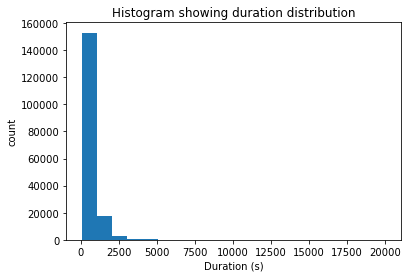

In [91]:
# set bins for the duration histogram
bins = np.arange(61, 20000+1000, 1000)

# plot the histogram
plt.hist(data=clean_df, x='duration_sec', bins=bins)
plt.ylabel('count')
plt.xlabel('Duration (s)')
plt.title('Histogram showing duration distribution');

> The histogram is right skewed after removing the outliers so i will apply the log scale

In [92]:
np.log10(clean_df.duration_sec.describe())

count    5.242489
mean     2.820414
std      2.867545
min      1.785330
25%      2.509203
50%      2.707570
75%      2.895975
max      4.300726
Name: duration_sec, dtype: float64

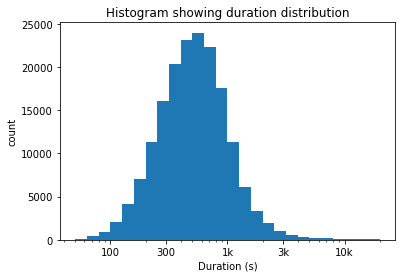

In [93]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = [100, 300, '1k', '3k', '10k']

# plot the histogram
plt.hist(data = clean_df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('count')
plt.xlabel('Duration (s)')
plt.title('Histogram showing duration distribution');

The duration display shows an unimodal distribution with the maximum duration (peak) near 500 seconds

# 2.3 Birth Year
> In the next cell i will display the data related ti birth year

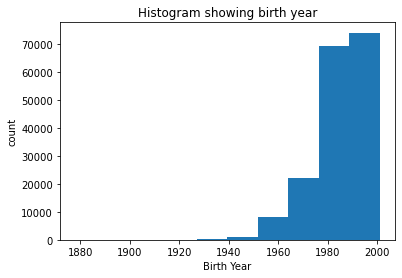

In [94]:
# histogram of birth year
plt.hist(data=clean_df, x='member_birth_year')
plt.ylabel('count')
plt.xlabel('Birth Year')
plt.title('Histogram showing birth year');

> The user born in 1940 have the lowest proportion

In [95]:
#get all rows where 'member_birth_year' is less than 1940
df_1940 = clean_df.query('member_birth_year < 1940')

In [96]:
df_1940.shape

(203, 14)

> People older than 80 years do not use to ride the bike so the data points below 1939 should be dropped

In [97]:
# filter the outlier
clean_df = clean_df.query("member_birth_year > 1939")

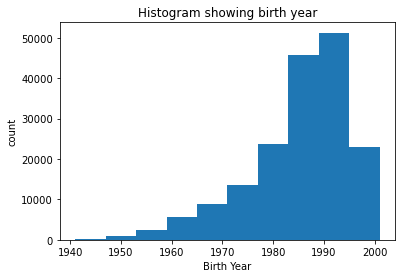

In [98]:
# birth year histogram.
plt.hist(data=clean_df, x='member_birth_year')
plt.ylabel('count')
plt.xlabel('Birth Year')
plt.title('Histogram showing birth year');

> The above distributin shows that the lagest distribution are users born in 1995

## 2.4 Distance and location
> In the next i will explore the distribution and the location

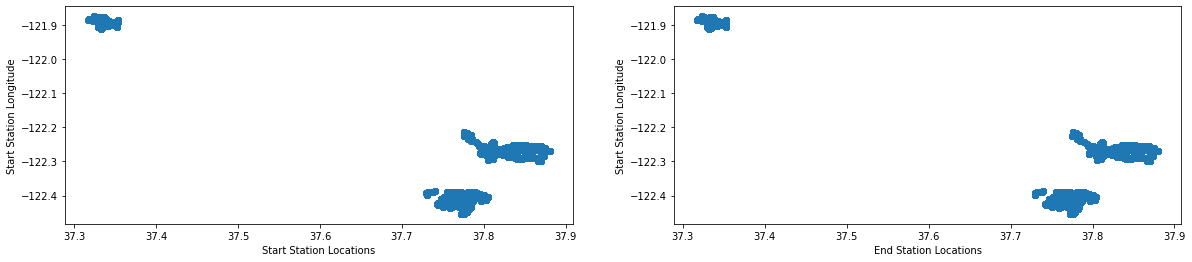

In [99]:
# distribution of satrt location and 
plt.figure(figsize=[20, 4])

plt.subplot(1, 2, 1)
plt.scatter(data= clean_df, x='start_station_latitude', y='start_station_longitude')
plt.ylabel('Start Station Longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=clean_df, x='end_station_latitude', y='end_station_longitude')
plt.ylabel('Start Station Longitude')
plt.xlabel('End Station Locations');

> The above plot shows that the start locations are at three locations. It is the same for end stations, it will be so cool to calculate the distance between start and end stations.

In [100]:
# distance between start and end stations
clean_df['distance'] = np.sqrt((clean_df.start_station_longitude - clean_df.end_station_longitude) ** 2
                               + (clean_df.start_station_latitude - clean_df.end_station_latitude) ** 2)




In [101]:
clean_df.distance.describe()


count    174576.000000
mean          0.016943
std           0.010915
min           0.000000
25%           0.009139
50%           0.014211
75%           0.022264
max           0.699399
Name: distance, dtype: float64

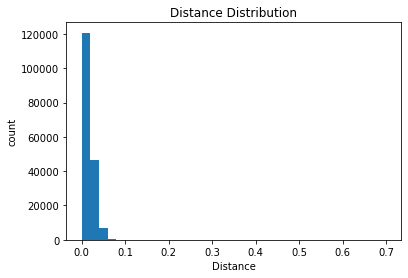

In [102]:
# plot the patterns of distance
bins = np.arange(0, 0.7+0.02, 0.02)
plt.hist(data=clean_df, x='distance', bins=bins)
plt.ylabel('count')
plt.xlabel('Distance')
plt.title('Distance Distribution');

> The above histogram shows that the distance is right skewed so i will do the log transform

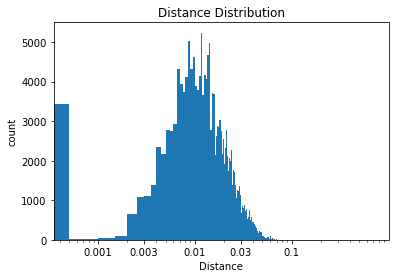

In [103]:
bins = np.arange(0, 0.7+0.0005, 0.0005)
ticks = [0.001, 0.003, 0.01, 0.03, 0.1]

plt.hist(data= clean_df, x='distance', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.ylabel('count')
#plt.xlim(0, 0.1)
plt.xlabel('Distance')
plt.title('Distance Distribution');

> The above plot shows that 3500 observations have distance below 0.0005. Next the histogragam shows that some start and end distance are the same (that can mean that there is no movement or the bike rider return to the start location after riding and end the ride at the start location). The plot shows that the remaing data follows an unimodal distribution with the peak around 0.015

## 2.5 User type
> In the next cell i will explore the user type and display the data

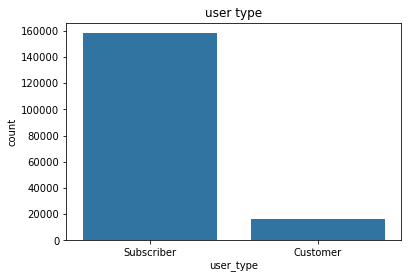

In [104]:
# plot data related to 'user_type'
base_color = sb.color_palette()[0]
sb.countplot(data=clean_df, x='user_type', color=base_color)
plt.title('user type');


> The above plot shows that the Subscribers have the highest proportion and the customers have the least

## 2.6 User gender
> In the next cell i will explore the useer gender

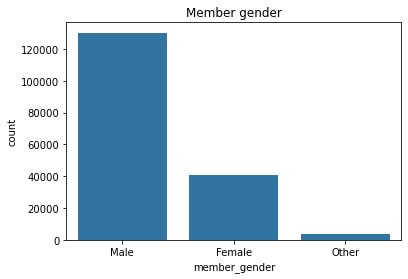

In [105]:
# plot the data related to 'member_gender'
base_color = sb.color_palette()[0]
sb.countplot(data=clean_df, x='member_gender', color=base_color)
plt.title('Member gender');

> The above plot show that Male members have the highest proportion followed by the Female gender, the other has low proportion

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration in second (durection_sec) has outliers, i dropped 174 outliers so i can visualize the data, after dropping the outliers, the plot was still right skewed so i applied the log transform. The birth year variable has outlier, there are observation were birth year is before 1939 that mean in february 2019 those people have more than 80 years and it is uncommun to see people of this age ride a bike.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration in second and the birth year variables have outliers, i dropped the outliers because they in a very small proportion compared to the entire dataset

## 3. Bivariate Exploration

> In this section,i will investigate relationships between pairs of variables in the
data. The variable i will use have been introduced in the above cells

## 3.1 Duration and start_dayofweek
> In the next cells, i will plot the realtionship between the duration and the month

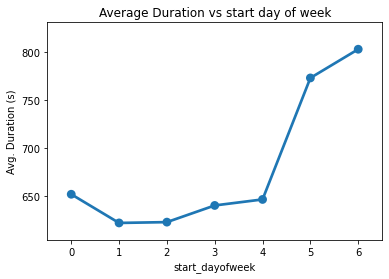

In [106]:
# Plot the duration with respect to month
sb.pointplot(data=clean_df, x='start_dayofweek', y='duration_sec', errwidth=0)
plt.xlabel('start_dayofweek')
plt.ylabel('Avg. Duration (s)')
plt.title('Average Duration vs start day of week');

> The above plot shows that on the seventh day of the week the duration is higesht and lowest on the second day of the week

## 3.2 Duration vs. Birth Year
> In the next cell, i will dsiplay the relationship between the duration and the birth year

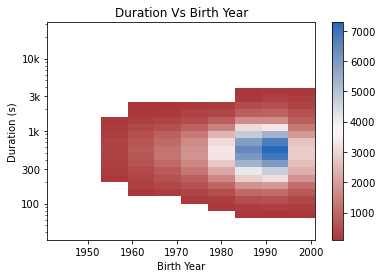

In [107]:
#heatmap between the birth year and duration
y_bins = 10 ** np.arange(1.5, 4.5+0.1, 0.1)
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']

plt.hist2d(data=clean_df, x='member_birth_year', y='duration_sec', cmap='vlag_r', cmin=100, bins=[10, y_bins])
plt.colorbar()
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Birth Year')
plt.ylabel('Duration (s)')
plt.title('Duration Vs Birth Year');

> The above plot shows that the largest population is between 1985 and 2000

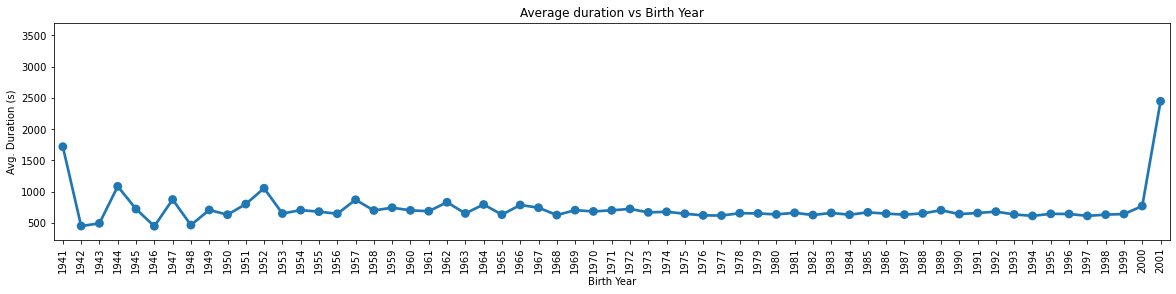

In [108]:
# let plot another type of plot (Point plot)
plt.figure(figsize=[20, 4])

sb.pointplot(data=clean_df, x='member_birth_year', y='duration_sec', errwidth=0)
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)')
plt.title('Average duration vs Birth Year');

> Tge above plot shows that users born in 2001 have the highest (around 2500 seconds) average ride duration and user born in 1946 have the lowest duration (around 450 seconds)

## 3.3 Duration vs Distance
> In the next cell, i will display the relation between the duration and the distance


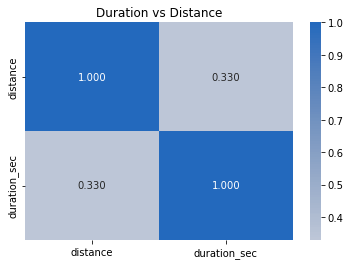

In [109]:
sb.heatmap(clean_df[['distance', 'duration_sec']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Duration vs Distance');

> The correlation between the distance and the duration in second is very low

## 3.4 Duration vs user_types


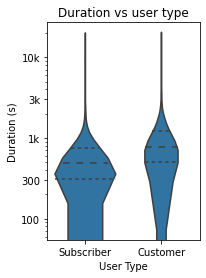

In [110]:
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']

plt.subplot(1, 2, 1)
sb.violinplot(data=clean_df, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.title('Duration vs user type');

> The customer has the median and the mode higher than the subscriber

## 3.5 Duration vs member_gender

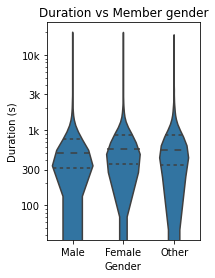

In [111]:
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']
base_color = sb.color_palette()[0]

# plot the violinplot for the gender
plt.subplot(1, 2, 2)
sb.violinplot(data=clean_df, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
plt.title('Duration vs Member gender');

> The male, fema and other gender subscriber have almost same values for the median and mode. The plot show an even distribution of Male gender

## 3.6 member_gender vs user_type

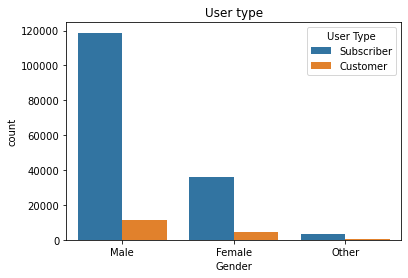

In [112]:
# relationship between member_gender and user type
sb.countplot(data=clean_df, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.legend(title='User Type')
plt.title('User type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that average ride duration is higher on weekends (saturday and sanday), sunday has the highest ride duration, during the other week day the ride duration is very small compared to the weekends. The correlation between distance and duration is very low

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that the Male subscibers have the higest proportion in the dataset.

## 4. Multivariate Exploration

> Plots of three or more variables to investigate the data even
further. 

## 4.1 Relationship between 'member_gender', 'duration_sec', and 'Gender'

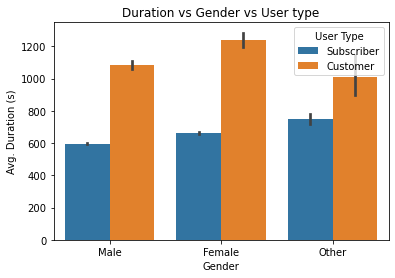

In [113]:
# relationship between user type and gender
sb.barplot(data= clean_df, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration (s)')
plt.title('Duration vs Gender vs User type')
plt.legend(title='User Type');

> The customer has the highest duration and the male customer has the highest proportion

### 4.2 Duration vs Birth Year vs member_gender vs user_type 

In [114]:
def hist2dgrid(x, y, **kwargs):
    """Creating a heat map with seaborn's PairGrid"""
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.5, 4.5+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)

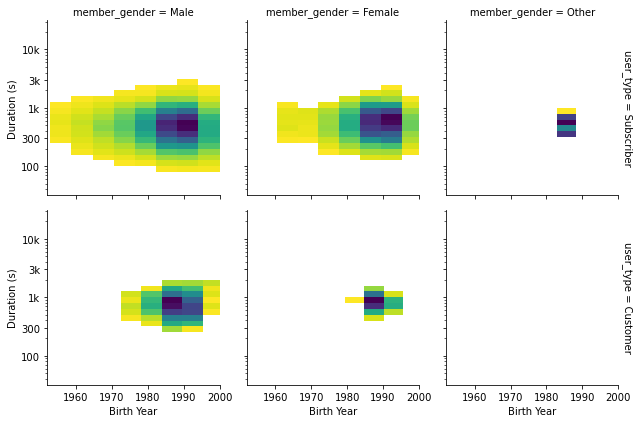

In [115]:
# plot the heatmap
hm = sb.FacetGrid(data=clean_df, col='member_gender', row='user_type', margin_titles=True)
hm.map(hist2dgrid, 'member_birth_year', 'duration_sec', color='viridis_r')
hm.set_xlabels('Birth Year')
hm.set_ylabels('Duration (s)');

> The above heat map shows that the male subsribers have the highest proportion

## 4.3 Duration vs. start_dayofweek vs gender or user_type

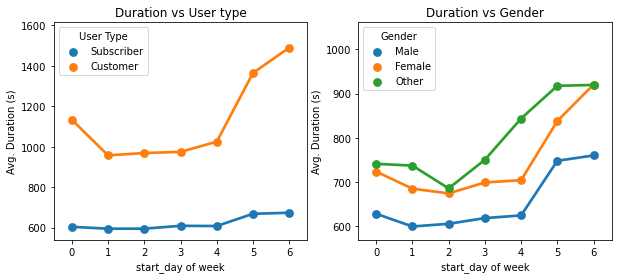

In [116]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=clean_df, x='start_dayofweek', y='duration_sec', hue='user_type', errwidth=0)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')
plt.title('Duration vs User type')
# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sb.pointplot(data=clean_df, x='start_dayofweek', y='duration_sec', hue='member_gender', errwidth=0)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender')
plt.title('Duration vs Gender');

> The above plots show that the customer has the highest duration and the other gender is riding more in the basis of start day of week

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The customer has the highest duration and the male customer has the highest proportion and the customer has the highest duration and the other gender is riding more in the basis of start day of week

### Were there any interesting or surprising interactions between features?

> The customer ride duration increases very high on saturday and sunday while the subscriber ride duration increases slightly on weekends

## Conclusions
> After exploring this dataset, i come to the conclusion that the diatance and the duration have a very small correlation, customers ride longer than the subscribers. Saturday and sundays are the days with longer ride duration and the female customers average ride duration is the highest.